In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 构建样本数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [3]:
# 先用线性回归进行拟合
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
y_predict = lr.predict(X)

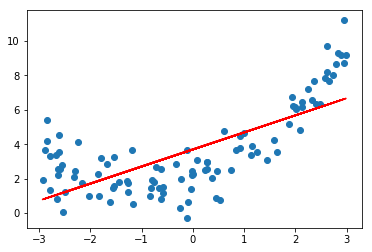

In [4]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

In [5]:
# 导入均方误差
from sklearn.metrics import mean_squared_error

In [6]:
mean_squared_error(y, y_predict)

3.0971293938783955

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [8]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scalar", StandardScaler()),
        ("lr", LinearRegression())
    ])

In [9]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)
y2_predict = poly2_reg.predict(X)

In [10]:
mean_squared_error(y, y2_predict)

0.98585727004434742

In [11]:
poly5_reg = PolynomialRegression(degree=5)
poly5_reg.fit(X, y)
y5_predict = poly5_reg.predict(X)

In [12]:
mean_squared_error(y, y5_predict)

0.96901237898649639

In [13]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)

In [14]:
mean_squared_error(y, y100_predict)

0.5127716739653263

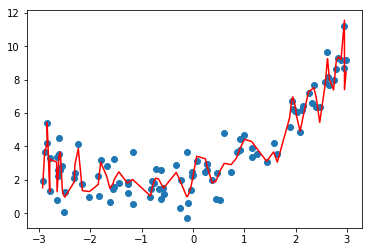

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

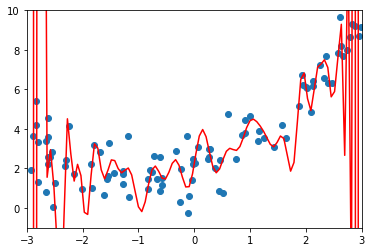

In [16]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -1, 10])
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
X_train.shape

(75, 1)

In [19]:
X_test.shape

(25, 1)

In [23]:
poly100_reg.fit(X_train, y_train)
y100_predict_train = poly100_reg.predict(X_train)

In [24]:
mean_squared_error(y_train, y100_predict_train)

0.31894921748706134

In [25]:
y100_predict_test = poly100_reg.predict(X_test)

In [26]:
mean_squared_error(y_test, y100_predict_test)

223782770464.89853

In [27]:
poly2_reg.fit(X_train, y_train)
y2_predict_train = poly2_reg.predict(X_train)

In [28]:
mean_squared_error(y_train, y2_predict_train)

1.0237070125963763

In [29]:
y2_predict_test = poly2_reg.predict(X_test)

In [30]:
mean_squared_error(y_test, y2_predict_test)

0.87695907380413585